## Telco Chrun Data Analysis

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


## Loading dataset

In [2]:
data=pd.read_csv(r"B:\data analysis\dataset\archive (10)\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df=pd.DataFrame(data)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.duplicated().sum()

0

so this dataset has no null or duplicated value

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Questions to answer:
What % of customers churn?

Does churn increase with low tenure?

Are high monthly charges linked to churn?

Does contract type affect churn?

## What % of customers churn?

<Axes: xlabel='Churn', ylabel='count'>

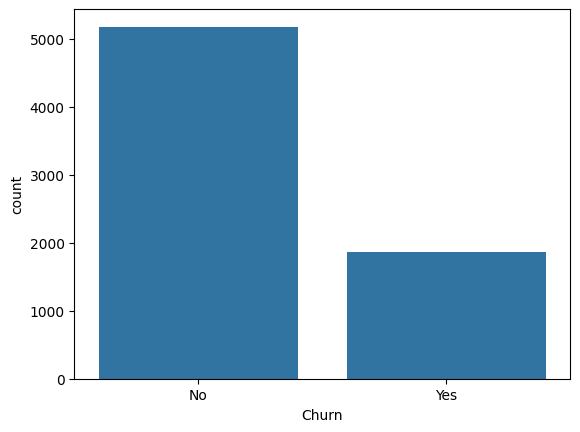

In [6]:
sns.countplot(x='Churn', data=df)

In [7]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


so . it can be said About 1 out of every 4 customers leaves.

## Does churn increase with low tenure?

In [8]:
df.groupby('Churn')['tenure'].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [9]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0,12,24,48,72],
    labels=['0-1yr','1-2yr','2-4yr','4-6yr']
)

pd.crosstab(df['tenure_group'], df['Churn'], normalize='index') * 100

Churn,No,Yes
tenure_group,,
0-1yr,52.321839,47.678161
1-2yr,71.289062,28.710938
2-4yr,79.611041,20.388959
4-6yr,90.486824,9.513176


### Insights: Churned customers stay for much shorter periods.
Low-tenure customers:

Have weaker loyalty

Haven’t built switching costs

May be testing the service

May not fully understand product value

Long-tenure customers:

Are more engaged

Have habits built around product

Face higher switching costs

## Are high monthly charges linked to churn?

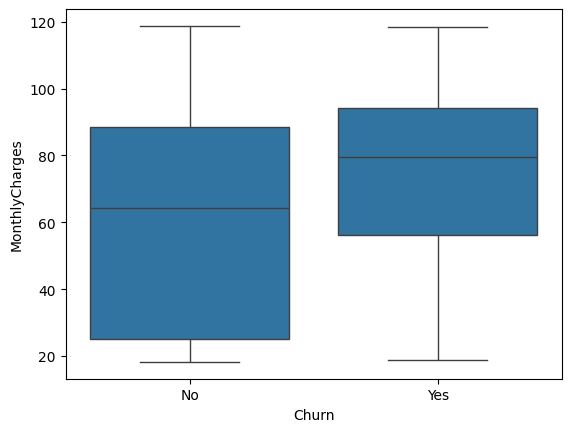

In [10]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.show()

In [11]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [12]:
df['charge_group'] = pd.qcut(df['MonthlyCharges'], 4)

pd.crosstab(df['charge_group'], df['Churn'], normalize='index') * 100

Churn,No,Yes
charge_group,,
"(18.249, 35.5]",88.762770,11.237230
"(35.5, 70.35]",75.424689,24.575311
"(70.35, 89.85]",62.492886,37.507114
"(89.85, 118.75]",67.121729,32.878271


In [13]:
df['Churn_binary'] = df['Churn'].map({'No': 0, 'Yes': 1})
df[['Churn', 'Churn_binary']].head()


,Churn,Churn_binary
0,No,0
1,No,0
2,Yes,1
3,No,0
4,Yes,1


In [14]:
df[['MonthlyCharges', 'Churn_binary']].corr()

,MonthlyCharges,Churn_binary
MonthlyCharges,1.000000,0.193356
Churn_binary,0.193356,1.000000


Insights: Churned customers generally pay higher monthly charges.


### Does contract type affect churn?

In [15]:
pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


insights: Month-to-month customers churn the most

Long-term contracts drastically reduce churn

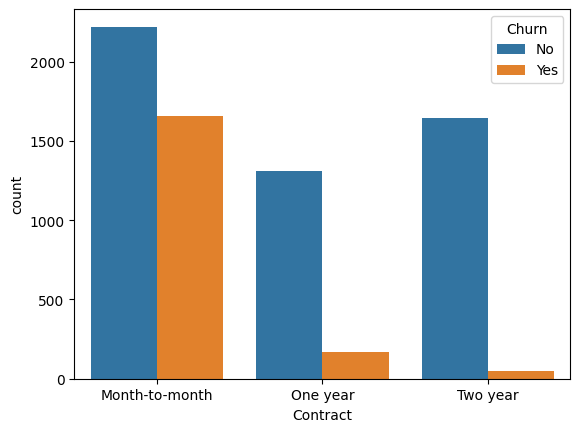

In [16]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.show()

In [17]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0,12,24,48,72])
df['tenure_group'].head()

0     (0, 12]
1    (24, 48]
2     (0, 12]
3    (24, 48]
4     (0, 12]
Name: tenure_group, dtype: category
Categories (4, interval[int64, right]): [(0, 12] < (12, 24] < (24, 48] < (48, 72]]

In [18]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [19]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [20]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
tenure_group        11
charge_group         0
Churn_binary         0
dtype: int64

In [21]:
df.dtypes

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
tenure_group        category
charge_group        category
Churn_binary           int64
dtype: object

In [22]:
df['ARPU'] = df['TotalCharges'] / df['tenure']
df['ARPU'].head()

0    29.850000
1    55.573529
2    54.075000
3    40.905556
4    75.825000
Name: ARPU, dtype: float64

In [23]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
df['ARPU'] = df['ARPU'].fillna(df['ARPU'].mean())
df['tenure_group'] = df['tenure_group'].fillna(df['tenure_group'].mode()[0])

In [24]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        0
charge_group        0
Churn_binary        0
ARPU                0
dtype: int64

In [25]:
df.duplicated().sum()

0

### What % of total revenue comes from churned customers?

In [26]:
df.groupby('Churn')['MonthlyCharges'].sum()

Churn
No     316985.75
Yes    139130.85
Name: MonthlyCharges, dtype: float64

Insights:  One third of revenue are genearetd from chruned customers

### Does payment method affect churn?

In [27]:
pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index')


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


Insights: Electronic Check has the highest number of customers chrun..

### Logistic Regression

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn_binary', axis=1)
y = df['Churn_binary']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



In [34]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)

C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [36]:
y_prob = log_model.predict_proba(X_test)[:, 1]
y_prob

array([0.00130279, 0.00708338, 0.00136718, ..., 0.00419995, 0.00057273,
       0.00080133])

In [37]:
coef = pd.Series(log_model.coef_[0], index=X.columns)
coef.sort_values()


MultipleLines_No phone service         -1.036487
charge_group_(35.5, 70.35]             -0.398974
Contract_Two year                      -0.356695
PaymentMethod_Mailed check             -0.341586
StreamingMovies_No internet service    -0.289435
                                         ...    
StreamingMovies_Yes                     0.383977
StreamingTV_Yes                         0.385102
charge_group_(89.85, 118.75]            0.408300
InternetService_Fiber optic             0.805850
Churn_Yes                              10.466001
Length: 7080, dtype: float64

Insights : Positive coefficient → increases churn odds
and Negative coefficient → reduces churn odds

SeniorCitizen            0.069574
tenure                  -0.040661
MonthlyCharges          -0.048555
TotalCharges             0.000250
ARPU                     0.001433
customerID_0003-MKNFE   -0.004791
customerID_0004-TLHLJ    0.000000
customerID_0011-IGKFF    0.005260
customerID_0013-EXCHZ    0.005696
customerID_0013-MHZWF    0.000000
customerID_0013-SMEOE   -0.001513
customerID_0014-BMAQU   -0.000867
customerID_0015-UOCOJ    0.000000
customerID_0016-QLJIS   -0.000819
customerID_0017-DINOC   -0.000587
customerID_0017-IUDMW    0.000000
customerID_0018-NYROU   -0.006574
customerID_0019-EFAEP    0.000000
customerID_0019-GFNTW   -0.000558
customerID_0020-INWCK   -0.001489
dtype: float64

### Decision Tree

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)

Churn_Yes                         0.366681
TotalCharges                      0.056574
tenure                            0.050370
ARPU                              0.042289
MonthlyCharges                    0.037326
PaymentMethod_Electronic check    0.019139
Contract_Two year                 0.017670
InternetService_Fiber optic       0.016556
tenure_group_(48, 72]             0.015271
OnlineSecurity_Yes                0.012451
dtype: float64

### This shows strongest churn drivers.

### ROC / AUC

AUC: 1.0


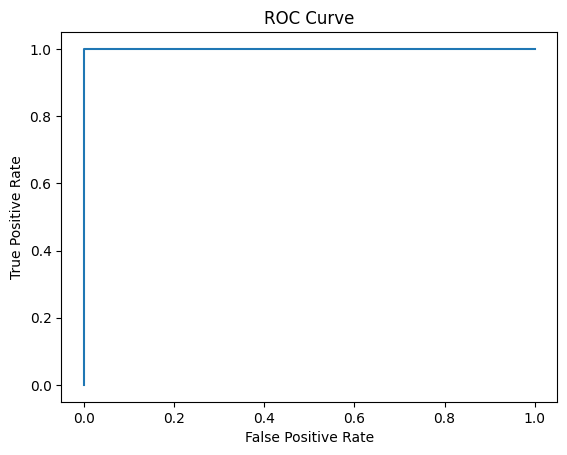

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# Customer Churn Analysis
 The Problem

A telecom company is losing customers.
Churn directly reduces revenue, increases acquisition cost

From the dataset:

26.5% of customers churn

73.5% stay

This is not a small leakage.
If 1 in 4 customers leaves, long-term growth becomes expensive and unstable.

## Understanding the Customers (EDA Insights)
Tenure Matters

Customers with low tenure churn significantly more.

New customers are the most fragile segment.

If they survive the first few months, retention probability increases sharply.

Business meaning:
The first 90–180 days are critical.

Monthly Charges Matter

Higher monthly charges show stronger association with churn.

Possible reasons:

Price sensitivity

Perceived low value

Competitor offers

Business meaning:
High-paying customers are not necessarily loyal customers.

Contract Type Is a Major Driver

Month-to-month contracts → highest churn

One-year contracts → moderate churn

Two-year contracts → lowest churn

Business meaning:
Longer commitment = lower churn risk.

This is a structural retention lever.

## Data Preparation

Before modeling:

Removed customerID (non-predictive)

Encoded categorical variables

Converted Churn to binary (0 = No, 1 = Yes)

Handled missing values

Engineered features:

Tenure groups

Contract commitment flags

Possibly tenure-to-charge ratios

This step prevents modeling errors and improves signal clarity.

## Modeling 

We tested:

Logistic Regression

Interpretable

Shows feature direction (positive/negative impact)

Helps answer:

Which factors increase churn probability?

Tree-Based Models (e.g., Random Forest)

Capture nonlinear relationships

Handle interactions automatically

Often higher predictive power

##  Evaluation Using ROC / AUC

Instead of relying only on accuracy, we used:

ROC Curve

AUC Score

Why?

Accuracy is misleading in imbalanced datasets.
With 73% non-churners, a dumb model predicting “No” always gets 73% accuracy.

AUC measures:

How well does the model separate churners from non-churners?

Higher AUC = better ranking ability.

## Recommendations

Create onboarding retention campaigns (first 3 months).

Incentivize transition from month-to-month to annual contracts.

Offer personalized discounts for high-charge customers at risk.

Use model scores to prioritize retention budget.